https://www.kaggle.com/mmkvarma/cryotherapy-analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import sklearn
from scipy.stats import sem
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [2]:
df = pd.read_excel('Cryotherapy.xlsx')

In [3]:
df.head()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100,0
1,1,29,7.00,5,1,96,1
2,1,50,8.00,1,3,132,0
3,1,32,11.75,7,3,750,0
4,1,67,9.25,1,1,42,0


In [4]:
df.shape

(90, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
sex                    90 non-null int64
age                    90 non-null int64
Time                   90 non-null float64
Number_of_Warts        90 non-null int64
Type                   90 non-null int64
Area                   90 non-null int64
Result_of_Treatment    90 non-null int64
dtypes: float64(1), int64(6)
memory usage: 5.0 KB


In [6]:
df.columns

Index(['sex', 'age', 'Time', 'Number_of_Warts', 'Type', 'Area',
       'Result_of_Treatment'],
      dtype='object')

In [7]:
df.describe()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.477778,28.600000,7.666667,5.511111,1.700000,85.833333,0.533333
std,0.502304,13.360852,3.406661,3.567155,0.905042,131.733153,0.501683
min,1.000000,15.000000,0.250000,1.000000,1.000000,4.000000,0.000000
25%,1.000000,18.000000,4.562500,2.000000,1.000000,20.000000,0.000000
50%,1.000000,25.500000,8.500000,5.000000,1.000000,70.000000,1.000000
75%,2.000000,35.000000,10.687500,8.000000,3.000000,100.000000,1.000000
max,2.000000,67.000000,12.000000,12.000000,3.000000,750.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000024B5C1A8D0>,
      dtype=object)

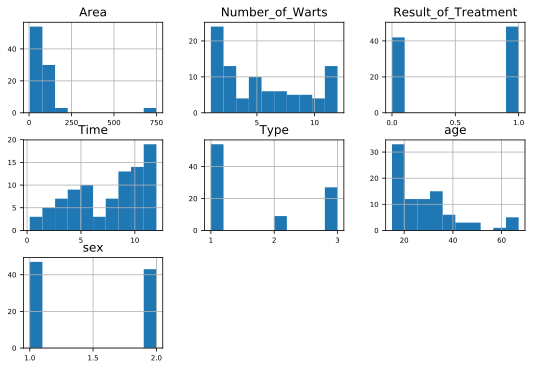

In [8]:
df.hist(figsize=(9, 6), xlabelsize=7, ylabelsize=7)

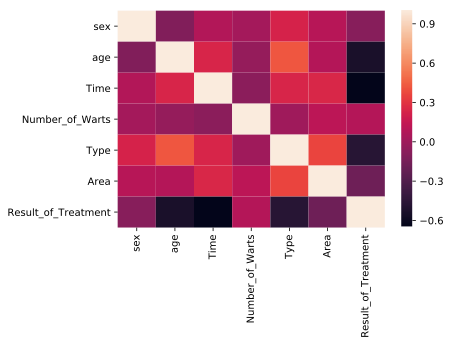

In [9]:
sns.heatmap(df.corr())

In [10]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [11]:
X = df[['sex', 'age', 'Time', 'Number_of_Warts', 'Type', 'Area']]
y = df[['Result_of_Treatment']]

# AdaBoostClassifier

In [56]:
from sklearn.ensemble import AdaBoostClassifier

In [57]:
adaBoost_clf = AdaBoostClassifier()

In [61]:
adaBoost_score = cross_val_score(adaBoost_clf, X, y, cv=5, scoring='accuracy').mean()

In [62]:
adaBoost_score

0.9213622291021671

# GradientBoostingClassifier

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

In [64]:
GB_clf = GradientBoostingClassifier()

In [67]:
GB_score = cross_val_score(GB_clf, X, y, cv=5, scoring='accuracy').mean()

In [68]:
GB_score

0.8997248022015822

# LightGBM Classifier

In [73]:
from lightgbm import LGBMClassifier

In [77]:
lgbm = LGBMClassifier()

In [80]:
lgbm_score = cross_val_score(lgbm, X, y, cv=5, scoring='accuracy').mean()

In [81]:
lgbm_score

0.9102511179910561

# CatBoostClassifier

In [83]:
from catboost import CatBoostClassifier

In [84]:
CB_clf = CatBoostClassifier()

In [85]:
CB_score = cross_val_score(CB_clf, X, y, cv=5, scoring='accuracy').mean()

Learning rate set to 0.007926
0:	learn: 0.6878268	total: 86.8ms	remaining: 1m 26s
1:	learn: 0.6805520	total: 100ms	remaining: 49.9s
2:	learn: 0.6733674	total: 110ms	remaining: 36.5s
3:	learn: 0.6649510	total: 115ms	remaining: 28.7s
4:	learn: 0.6590608	total: 124ms	remaining: 24.7s
5:	learn: 0.6532552	total: 130ms	remaining: 21.6s
6:	learn: 0.6453014	total: 138ms	remaining: 19.5s
7:	learn: 0.6382612	total: 145ms	remaining: 18s
8:	learn: 0.6339317	total: 154ms	remaining: 16.9s
9:	learn: 0.6249884	total: 161ms	remaining: 15.9s
10:	learn: 0.6211859	total: 167ms	remaining: 15s
11:	learn: 0.6155219	total: 174ms	remaining: 14.4s
12:	learn: 0.6091639	total: 183ms	remaining: 13.9s
13:	learn: 0.6044425	total: 192ms	remaining: 13.5s
14:	learn: 0.5966690	total: 197ms	remaining: 13s
15:	learn: 0.5892575	total: 204ms	remaining: 12.6s
16:	learn: 0.5829925	total: 213ms	remaining: 12.3s
17:	learn: 0.5777527	total: 221ms	remaining: 12.1s
18:	learn: 0.5717489	total: 230ms	remaining: 11.9s
19:	learn: 0.56

171:	learn: 0.2125293	total: 1.6s	remaining: 7.71s
172:	learn: 0.2116307	total: 1.61s	remaining: 7.71s
173:	learn: 0.2108768	total: 1.62s	remaining: 7.71s
174:	learn: 0.2100718	total: 1.63s	remaining: 7.69s
175:	learn: 0.2090789	total: 1.64s	remaining: 7.68s
176:	learn: 0.2082380	total: 1.65s	remaining: 7.67s
177:	learn: 0.2069760	total: 1.66s	remaining: 7.67s
178:	learn: 0.2056324	total: 1.68s	remaining: 7.69s
179:	learn: 0.2048784	total: 1.69s	remaining: 7.71s
180:	learn: 0.2039382	total: 1.7s	remaining: 7.69s
181:	learn: 0.2031981	total: 1.71s	remaining: 7.68s
182:	learn: 0.2015172	total: 1.72s	remaining: 7.67s
183:	learn: 0.2007232	total: 1.73s	remaining: 7.66s
184:	learn: 0.1996862	total: 1.74s	remaining: 7.65s
185:	learn: 0.1989546	total: 1.75s	remaining: 7.64s
186:	learn: 0.1984838	total: 1.75s	remaining: 7.62s
187:	learn: 0.1971723	total: 1.76s	remaining: 7.61s
188:	learn: 0.1964577	total: 1.77s	remaining: 7.6s
189:	learn: 0.1956451	total: 1.78s	remaining: 7.58s
190:	learn: 0.1

338:	learn: 0.1166036	total: 3.14s	remaining: 6.12s
339:	learn: 0.1159869	total: 3.15s	remaining: 6.12s
340:	learn: 0.1159054	total: 3.16s	remaining: 6.11s
341:	learn: 0.1156309	total: 3.17s	remaining: 6.11s
342:	learn: 0.1153496	total: 3.18s	remaining: 6.1s
343:	learn: 0.1150102	total: 3.19s	remaining: 6.09s
344:	learn: 0.1143243	total: 3.2s	remaining: 6.08s
345:	learn: 0.1140560	total: 3.21s	remaining: 6.07s
346:	learn: 0.1132736	total: 3.23s	remaining: 6.07s
347:	learn: 0.1129351	total: 3.24s	remaining: 6.06s
348:	learn: 0.1126136	total: 3.25s	remaining: 6.05s
349:	learn: 0.1122838	total: 3.26s	remaining: 6.05s
350:	learn: 0.1117078	total: 3.27s	remaining: 6.04s
351:	learn: 0.1114883	total: 3.27s	remaining: 6.03s
352:	learn: 0.1110378	total: 3.28s	remaining: 6.02s
353:	learn: 0.1104016	total: 3.29s	remaining: 6.01s
354:	learn: 0.1101076	total: 3.3s	remaining: 6s
355:	learn: 0.1094583	total: 3.31s	remaining: 5.99s
356:	learn: 0.1091456	total: 3.32s	remaining: 5.98s
357:	learn: 0.1087

517:	learn: 0.0713596	total: 4.83s	remaining: 4.5s
518:	learn: 0.0711527	total: 4.85s	remaining: 4.49s
519:	learn: 0.0711178	total: 4.85s	remaining: 4.48s
520:	learn: 0.0709563	total: 4.86s	remaining: 4.47s
521:	learn: 0.0708129	total: 4.88s	remaining: 4.47s
522:	learn: 0.0706993	total: 4.89s	remaining: 4.46s
523:	learn: 0.0706652	total: 4.89s	remaining: 4.45s
524:	learn: 0.0704275	total: 4.9s	remaining: 4.43s
525:	learn: 0.0703942	total: 4.91s	remaining: 4.42s
526:	learn: 0.0702027	total: 4.92s	remaining: 4.41s
527:	learn: 0.0700854	total: 4.92s	remaining: 4.4s
528:	learn: 0.0699360	total: 4.94s	remaining: 4.39s
529:	learn: 0.0698190	total: 4.95s	remaining: 4.39s
530:	learn: 0.0694647	total: 4.96s	remaining: 4.38s
531:	learn: 0.0692290	total: 4.97s	remaining: 4.37s
532:	learn: 0.0691466	total: 4.98s	remaining: 4.36s
533:	learn: 0.0689691	total: 4.99s	remaining: 4.35s
534:	learn: 0.0688680	total: 5s	remaining: 4.34s
535:	learn: 0.0685240	total: 5.01s	remaining: 4.33s
536:	learn: 0.0683

676:	learn: 0.0504286	total: 6.31s	remaining: 3.01s
677:	learn: 0.0503517	total: 6.33s	remaining: 3s
678:	learn: 0.0502754	total: 6.33s	remaining: 3s
679:	learn: 0.0501047	total: 6.35s	remaining: 2.99s
680:	learn: 0.0499530	total: 6.36s	remaining: 2.98s
681:	learn: 0.0498626	total: 6.36s	remaining: 2.97s
682:	learn: 0.0497169	total: 6.37s	remaining: 2.96s
683:	learn: 0.0496613	total: 6.38s	remaining: 2.95s
684:	learn: 0.0495043	total: 6.39s	remaining: 2.94s
685:	learn: 0.0493600	total: 6.4s	remaining: 2.93s
686:	learn: 0.0492907	total: 6.41s	remaining: 2.92s
687:	learn: 0.0491692	total: 6.42s	remaining: 2.91s
688:	learn: 0.0490139	total: 6.43s	remaining: 2.9s
689:	learn: 0.0489506	total: 6.44s	remaining: 2.89s
690:	learn: 0.0488253	total: 6.45s	remaining: 2.88s
691:	learn: 0.0487308	total: 6.46s	remaining: 2.87s
692:	learn: 0.0485941	total: 6.47s	remaining: 2.86s
693:	learn: 0.0485371	total: 6.47s	remaining: 2.85s
694:	learn: 0.0485148	total: 6.48s	remaining: 2.84s
695:	learn: 0.048447

837:	learn: 0.0368122	total: 7.81s	remaining: 1.51s
838:	learn: 0.0367446	total: 7.82s	remaining: 1.5s
839:	learn: 0.0366191	total: 7.83s	remaining: 1.49s
840:	learn: 0.0365779	total: 7.84s	remaining: 1.48s
841:	learn: 0.0365315	total: 7.85s	remaining: 1.47s
842:	learn: 0.0364460	total: 7.86s	remaining: 1.46s
843:	learn: 0.0363302	total: 7.87s	remaining: 1.46s
844:	learn: 0.0362497	total: 7.88s	remaining: 1.45s
845:	learn: 0.0361997	total: 7.89s	remaining: 1.44s
846:	learn: 0.0361194	total: 7.9s	remaining: 1.43s
847:	learn: 0.0360251	total: 7.91s	remaining: 1.42s
848:	learn: 0.0359473	total: 7.92s	remaining: 1.41s
849:	learn: 0.0359139	total: 7.93s	remaining: 1.4s
850:	learn: 0.0358703	total: 7.94s	remaining: 1.39s
851:	learn: 0.0357980	total: 7.95s	remaining: 1.38s
852:	learn: 0.0357585	total: 7.96s	remaining: 1.37s
853:	learn: 0.0357026	total: 7.96s	remaining: 1.36s
854:	learn: 0.0356509	total: 7.97s	remaining: 1.35s
855:	learn: 0.0356314	total: 7.98s	remaining: 1.34s
856:	learn: 0.0

Learning rate set to 0.007926
0:	learn: 0.6835564	total: 18ms	remaining: 17.9s
1:	learn: 0.6761932	total: 32.5ms	remaining: 16.2s
2:	learn: 0.6690536	total: 44.2ms	remaining: 14.7s
3:	learn: 0.6615534	total: 50.9ms	remaining: 12.7s
4:	learn: 0.6523764	total: 57.2ms	remaining: 11.4s
5:	learn: 0.6432471	total: 66.5ms	remaining: 11s
6:	learn: 0.6354340	total: 75.7ms	remaining: 10.7s
7:	learn: 0.6286636	total: 84.3ms	remaining: 10.5s
8:	learn: 0.6232511	total: 90.8ms	remaining: 9.99s
9:	learn: 0.6151326	total: 99.6ms	remaining: 9.86s
10:	learn: 0.6115604	total: 106ms	remaining: 9.51s
11:	learn: 0.6039788	total: 115ms	remaining: 9.44s
12:	learn: 0.5967810	total: 126ms	remaining: 9.57s
13:	learn: 0.5908890	total: 136ms	remaining: 9.54s
14:	learn: 0.5833305	total: 142ms	remaining: 9.32s
15:	learn: 0.5766368	total: 156ms	remaining: 9.56s
16:	learn: 0.5697476	total: 166ms	remaining: 9.59s
17:	learn: 0.5624612	total: 175ms	remaining: 9.57s
18:	learn: 0.5563144	total: 185ms	remaining: 9.55s
19:	l

177:	learn: 0.1752788	total: 1.68s	remaining: 7.74s
178:	learn: 0.1743886	total: 1.68s	remaining: 7.72s
179:	learn: 0.1732103	total: 1.7s	remaining: 7.74s
180:	learn: 0.1722831	total: 1.71s	remaining: 7.73s
181:	learn: 0.1711980	total: 1.72s	remaining: 7.72s
182:	learn: 0.1708456	total: 1.72s	remaining: 7.7s
183:	learn: 0.1701436	total: 1.73s	remaining: 7.69s
184:	learn: 0.1693782	total: 1.74s	remaining: 7.68s
185:	learn: 0.1690288	total: 1.75s	remaining: 7.66s
186:	learn: 0.1682054	total: 1.76s	remaining: 7.65s
187:	learn: 0.1678526	total: 1.77s	remaining: 7.63s
188:	learn: 0.1671037	total: 1.77s	remaining: 7.62s
189:	learn: 0.1664709	total: 1.78s	remaining: 7.61s
190:	learn: 0.1652964	total: 1.79s	remaining: 7.6s
191:	learn: 0.1643702	total: 1.8s	remaining: 7.58s
192:	learn: 0.1633617	total: 1.81s	remaining: 7.57s
193:	learn: 0.1624447	total: 1.82s	remaining: 7.56s
194:	learn: 0.1623003	total: 1.82s	remaining: 7.53s
195:	learn: 0.1612057	total: 1.83s	remaining: 7.52s
196:	learn: 0.16

351:	learn: 0.0913956	total: 3.16s	remaining: 5.82s
352:	learn: 0.0912356	total: 3.17s	remaining: 5.81s
353:	learn: 0.0910446	total: 3.19s	remaining: 5.81s
354:	learn: 0.0906260	total: 3.19s	remaining: 5.8s
355:	learn: 0.0902110	total: 3.2s	remaining: 5.79s
356:	learn: 0.0900677	total: 3.21s	remaining: 5.79s
357:	learn: 0.0899038	total: 3.22s	remaining: 5.77s
358:	learn: 0.0896396	total: 3.23s	remaining: 5.76s
359:	learn: 0.0894312	total: 3.24s	remaining: 5.75s
360:	learn: 0.0888841	total: 3.25s	remaining: 5.75s
361:	learn: 0.0885897	total: 3.25s	remaining: 5.73s
362:	learn: 0.0881704	total: 3.26s	remaining: 5.71s
363:	learn: 0.0878499	total: 3.27s	remaining: 5.71s
364:	learn: 0.0877971	total: 3.27s	remaining: 5.69s
365:	learn: 0.0876363	total: 3.28s	remaining: 5.68s
366:	learn: 0.0873968	total: 3.29s	remaining: 5.67s
367:	learn: 0.0870656	total: 3.29s	remaining: 5.65s
368:	learn: 0.0868901	total: 3.3s	remaining: 5.64s
369:	learn: 0.0865538	total: 3.31s	remaining: 5.63s
370:	learn: 0.0

511:	learn: 0.0579138	total: 4.49s	remaining: 4.28s
512:	learn: 0.0577634	total: 4.5s	remaining: 4.27s
513:	learn: 0.0576122	total: 4.5s	remaining: 4.26s
514:	learn: 0.0574298	total: 4.51s	remaining: 4.25s
515:	learn: 0.0573855	total: 4.52s	remaining: 4.24s
516:	learn: 0.0572550	total: 4.53s	remaining: 4.23s
517:	learn: 0.0570906	total: 4.54s	remaining: 4.22s
518:	learn: 0.0569103	total: 4.54s	remaining: 4.21s
519:	learn: 0.0568320	total: 4.55s	remaining: 4.2s
520:	learn: 0.0567790	total: 4.56s	remaining: 4.19s
521:	learn: 0.0567214	total: 4.57s	remaining: 4.18s
522:	learn: 0.0564227	total: 4.57s	remaining: 4.17s
523:	learn: 0.0562802	total: 4.58s	remaining: 4.16s
524:	learn: 0.0562239	total: 4.59s	remaining: 4.15s
525:	learn: 0.0560882	total: 4.6s	remaining: 4.14s
526:	learn: 0.0559385	total: 4.6s	remaining: 4.13s
527:	learn: 0.0557754	total: 4.61s	remaining: 4.12s
528:	learn: 0.0556255	total: 4.62s	remaining: 4.12s
529:	learn: 0.0553336	total: 4.63s	remaining: 4.11s
530:	learn: 0.055

678:	learn: 0.0389943	total: 5.95s	remaining: 2.81s
679:	learn: 0.0389291	total: 5.96s	remaining: 2.81s
680:	learn: 0.0388709	total: 5.97s	remaining: 2.8s
681:	learn: 0.0388055	total: 5.98s	remaining: 2.79s
682:	learn: 0.0387244	total: 5.99s	remaining: 2.78s
683:	learn: 0.0386691	total: 6s	remaining: 2.77s
684:	learn: 0.0384320	total: 6.01s	remaining: 2.76s
685:	learn: 0.0383150	total: 6.02s	remaining: 2.75s
686:	learn: 0.0382102	total: 6.03s	remaining: 2.75s
687:	learn: 0.0381573	total: 6.03s	remaining: 2.74s
688:	learn: 0.0380545	total: 6.04s	remaining: 2.73s
689:	learn: 0.0380086	total: 6.05s	remaining: 2.72s
690:	learn: 0.0379408	total: 6.06s	remaining: 2.71s
691:	learn: 0.0378778	total: 6.07s	remaining: 2.7s
692:	learn: 0.0378463	total: 6.07s	remaining: 2.69s
693:	learn: 0.0378276	total: 6.08s	remaining: 2.68s
694:	learn: 0.0378222	total: 6.08s	remaining: 2.67s
695:	learn: 0.0377310	total: 6.09s	remaining: 2.66s
696:	learn: 0.0376287	total: 6.1s	remaining: 2.65s
697:	learn: 0.0375

857:	learn: 0.0276190	total: 7.44s	remaining: 1.23s
858:	learn: 0.0275771	total: 7.45s	remaining: 1.22s
859:	learn: 0.0275149	total: 7.46s	remaining: 1.21s
860:	learn: 0.0274965	total: 7.47s	remaining: 1.21s
861:	learn: 0.0274081	total: 7.48s	remaining: 1.2s
862:	learn: 0.0273477	total: 7.49s	remaining: 1.19s
863:	learn: 0.0272864	total: 7.49s	remaining: 1.18s
864:	learn: 0.0272422	total: 7.5s	remaining: 1.17s
865:	learn: 0.0272004	total: 7.51s	remaining: 1.16s
866:	learn: 0.0271648	total: 7.52s	remaining: 1.15s
867:	learn: 0.0271255	total: 7.53s	remaining: 1.14s
868:	learn: 0.0270931	total: 7.54s	remaining: 1.14s
869:	learn: 0.0270624	total: 7.54s	remaining: 1.13s
870:	learn: 0.0270455	total: 7.55s	remaining: 1.12s
871:	learn: 0.0270229	total: 7.56s	remaining: 1.11s
872:	learn: 0.0270121	total: 7.57s	remaining: 1.1s
873:	learn: 0.0269870	total: 7.58s	remaining: 1.09s
874:	learn: 0.0269197	total: 7.58s	remaining: 1.08s
875:	learn: 0.0268758	total: 7.59s	remaining: 1.07s
876:	learn: 0.0

16:	learn: 0.5805965	total: 156ms	remaining: 9.03s
17:	learn: 0.5745143	total: 167ms	remaining: 9.12s
18:	learn: 0.5687895	total: 177ms	remaining: 9.11s
19:	learn: 0.5648641	total: 185ms	remaining: 9.07s
20:	learn: 0.5583740	total: 192ms	remaining: 8.93s
21:	learn: 0.5517755	total: 200ms	remaining: 8.88s
22:	learn: 0.5470751	total: 208ms	remaining: 8.85s
23:	learn: 0.5412597	total: 217ms	remaining: 8.82s
24:	learn: 0.5365247	total: 226ms	remaining: 8.8s
25:	learn: 0.5304780	total: 234ms	remaining: 8.78s
26:	learn: 0.5259701	total: 240ms	remaining: 8.66s
27:	learn: 0.5225638	total: 248ms	remaining: 8.61s
28:	learn: 0.5200471	total: 257ms	remaining: 8.61s
29:	learn: 0.5168409	total: 266ms	remaining: 8.59s
30:	learn: 0.5113406	total: 275ms	remaining: 8.6s
31:	learn: 0.5086592	total: 281ms	remaining: 8.5s
32:	learn: 0.5034966	total: 290ms	remaining: 8.49s
33:	learn: 0.4994610	total: 297ms	remaining: 8.45s
34:	learn: 0.4945302	total: 306ms	remaining: 8.45s
35:	learn: 0.4914469	total: 315ms	

195:	learn: 0.1956843	total: 1.66s	remaining: 6.82s
196:	learn: 0.1951506	total: 1.67s	remaining: 6.81s
197:	learn: 0.1946530	total: 1.68s	remaining: 6.81s
198:	learn: 0.1937057	total: 1.69s	remaining: 6.8s
199:	learn: 0.1927968	total: 1.7s	remaining: 6.79s
200:	learn: 0.1922080	total: 1.71s	remaining: 6.79s
201:	learn: 0.1916750	total: 1.72s	remaining: 6.78s
202:	learn: 0.1908719	total: 1.72s	remaining: 6.77s
203:	learn: 0.1903709	total: 1.73s	remaining: 6.76s
204:	learn: 0.1897623	total: 1.74s	remaining: 6.75s
205:	learn: 0.1894411	total: 1.75s	remaining: 6.73s
206:	learn: 0.1890115	total: 1.75s	remaining: 6.72s
207:	learn: 0.1878076	total: 1.76s	remaining: 6.71s
208:	learn: 0.1870259	total: 1.77s	remaining: 6.71s
209:	learn: 0.1861912	total: 1.78s	remaining: 6.69s
210:	learn: 0.1858960	total: 1.79s	remaining: 6.68s
211:	learn: 0.1852822	total: 1.8s	remaining: 6.68s
212:	learn: 0.1846123	total: 1.8s	remaining: 6.67s
213:	learn: 0.1838307	total: 1.81s	remaining: 6.66s
214:	learn: 0.18

371:	learn: 0.1150525	total: 3.11s	remaining: 5.25s
372:	learn: 0.1149344	total: 3.11s	remaining: 5.23s
373:	learn: 0.1147082	total: 3.12s	remaining: 5.23s
374:	learn: 0.1143196	total: 3.13s	remaining: 5.22s
375:	learn: 0.1141044	total: 3.14s	remaining: 5.21s
376:	learn: 0.1138104	total: 3.15s	remaining: 5.21s
377:	learn: 0.1136780	total: 3.16s	remaining: 5.2s
378:	learn: 0.1134849	total: 3.17s	remaining: 5.19s
379:	learn: 0.1133234	total: 3.17s	remaining: 5.18s
380:	learn: 0.1130020	total: 3.18s	remaining: 5.17s
381:	learn: 0.1127990	total: 3.19s	remaining: 5.16s
382:	learn: 0.1126510	total: 3.2s	remaining: 5.15s
383:	learn: 0.1125447	total: 3.2s	remaining: 5.14s
384:	learn: 0.1124004	total: 3.21s	remaining: 5.13s
385:	learn: 0.1121545	total: 3.22s	remaining: 5.12s
386:	learn: 0.1119517	total: 3.23s	remaining: 5.11s
387:	learn: 0.1118300	total: 3.23s	remaining: 5.1s
388:	learn: 0.1115238	total: 3.24s	remaining: 5.09s
389:	learn: 0.1111568	total: 3.25s	remaining: 5.08s
390:	learn: 0.11

533:	learn: 0.0798048	total: 4.41s	remaining: 3.85s
534:	learn: 0.0794675	total: 4.42s	remaining: 3.85s
535:	learn: 0.0793086	total: 4.43s	remaining: 3.84s
536:	learn: 0.0792420	total: 4.44s	remaining: 3.83s
537:	learn: 0.0790354	total: 4.45s	remaining: 3.82s
538:	learn: 0.0789566	total: 4.46s	remaining: 3.81s
539:	learn: 0.0788580	total: 4.47s	remaining: 3.81s
540:	learn: 0.0786487	total: 4.48s	remaining: 3.8s
541:	learn: 0.0785076	total: 4.48s	remaining: 3.79s
542:	learn: 0.0783585	total: 4.49s	remaining: 3.78s
543:	learn: 0.0783249	total: 4.5s	remaining: 3.77s
544:	learn: 0.0780703	total: 4.51s	remaining: 3.77s
545:	learn: 0.0778914	total: 4.52s	remaining: 3.76s
546:	learn: 0.0778274	total: 4.52s	remaining: 3.75s
547:	learn: 0.0777180	total: 4.53s	remaining: 3.74s
548:	learn: 0.0776455	total: 4.54s	remaining: 3.73s
549:	learn: 0.0774162	total: 4.54s	remaining: 3.72s
550:	learn: 0.0773626	total: 4.55s	remaining: 3.71s
551:	learn: 0.0769668	total: 4.56s	remaining: 3.7s
552:	learn: 0.0

692:	learn: 0.0588608	total: 5.7s	remaining: 2.52s
693:	learn: 0.0588224	total: 5.7s	remaining: 2.51s
694:	learn: 0.0587307	total: 5.71s	remaining: 2.51s
695:	learn: 0.0587000	total: 5.72s	remaining: 2.5s
696:	learn: 0.0586317	total: 5.73s	remaining: 2.49s
697:	learn: 0.0584328	total: 5.74s	remaining: 2.48s
698:	learn: 0.0583421	total: 5.74s	remaining: 2.47s
699:	learn: 0.0582542	total: 5.75s	remaining: 2.46s
700:	learn: 0.0582238	total: 5.76s	remaining: 2.46s
701:	learn: 0.0581906	total: 5.77s	remaining: 2.45s
702:	learn: 0.0581236	total: 5.78s	remaining: 2.44s
703:	learn: 0.0579840	total: 5.79s	remaining: 2.43s
704:	learn: 0.0579440	total: 5.79s	remaining: 2.42s
705:	learn: 0.0578500	total: 5.8s	remaining: 2.42s
706:	learn: 0.0577697	total: 5.81s	remaining: 2.41s
707:	learn: 0.0574918	total: 5.82s	remaining: 2.4s
708:	learn: 0.0574280	total: 5.83s	remaining: 2.39s
709:	learn: 0.0574017	total: 5.84s	remaining: 2.39s
710:	learn: 0.0573472	total: 5.85s	remaining: 2.38s
711:	learn: 0.057

866:	learn: 0.0445062	total: 7.2s	remaining: 1.1s
867:	learn: 0.0444857	total: 7.2s	remaining: 1.09s
868:	learn: 0.0444777	total: 7.21s	remaining: 1.09s
869:	learn: 0.0444544	total: 7.22s	remaining: 1.08s
870:	learn: 0.0443892	total: 7.23s	remaining: 1.07s
871:	learn: 0.0442920	total: 7.24s	remaining: 1.06s
872:	learn: 0.0441652	total: 7.25s	remaining: 1.05s
873:	learn: 0.0441499	total: 7.25s	remaining: 1.04s
874:	learn: 0.0441216	total: 7.26s	remaining: 1.04s
875:	learn: 0.0440230	total: 7.27s	remaining: 1.03s
876:	learn: 0.0439961	total: 7.28s	remaining: 1.02s
877:	learn: 0.0439648	total: 7.28s	remaining: 1.01s
878:	learn: 0.0438227	total: 7.29s	remaining: 1s
879:	learn: 0.0437128	total: 7.3s	remaining: 995ms
880:	learn: 0.0435750	total: 7.31s	remaining: 987ms
881:	learn: 0.0435618	total: 7.32s	remaining: 979ms
882:	learn: 0.0434614	total: 7.32s	remaining: 970ms
883:	learn: 0.0434319	total: 7.33s	remaining: 962ms
884:	learn: 0.0433723	total: 7.34s	remaining: 954ms
885:	learn: 0.04322

37:	learn: 0.4780332	total: 331ms	remaining: 8.38s
38:	learn: 0.4721062	total: 343ms	remaining: 8.45s
39:	learn: 0.4675887	total: 358ms	remaining: 8.59s
40:	learn: 0.4626065	total: 366ms	remaining: 8.56s
41:	learn: 0.4578177	total: 373ms	remaining: 8.51s
42:	learn: 0.4533436	total: 379ms	remaining: 8.43s
43:	learn: 0.4486211	total: 388ms	remaining: 8.43s
44:	learn: 0.4446258	total: 397ms	remaining: 8.42s
45:	learn: 0.4409684	total: 405ms	remaining: 8.41s
46:	learn: 0.4358719	total: 414ms	remaining: 8.4s
47:	learn: 0.4317315	total: 423ms	remaining: 8.4s
48:	learn: 0.4272863	total: 432ms	remaining: 8.39s
49:	learn: 0.4230893	total: 439ms	remaining: 8.35s
50:	learn: 0.4193578	total: 448ms	remaining: 8.33s
51:	learn: 0.4155272	total: 457ms	remaining: 8.32s
52:	learn: 0.4117825	total: 465ms	remaining: 8.32s
53:	learn: 0.4080482	total: 475ms	remaining: 8.31s
54:	learn: 0.4039032	total: 482ms	remaining: 8.28s
55:	learn: 0.4006060	total: 491ms	remaining: 8.27s
56:	learn: 0.3975124	total: 499ms

215:	learn: 0.1626290	total: 1.83s	remaining: 6.66s
216:	learn: 0.1617606	total: 1.84s	remaining: 6.66s
217:	learn: 0.1615119	total: 1.85s	remaining: 6.64s
218:	learn: 0.1611158	total: 1.86s	remaining: 6.63s
219:	learn: 0.1602317	total: 1.87s	remaining: 6.63s
220:	learn: 0.1597488	total: 1.88s	remaining: 6.63s
221:	learn: 0.1593780	total: 1.89s	remaining: 6.62s
222:	learn: 0.1587871	total: 1.9s	remaining: 6.62s
223:	learn: 0.1578371	total: 1.91s	remaining: 6.63s
224:	learn: 0.1572208	total: 1.92s	remaining: 6.62s
225:	learn: 0.1566914	total: 1.93s	remaining: 6.61s
226:	learn: 0.1562098	total: 1.94s	remaining: 6.6s
227:	learn: 0.1558042	total: 1.95s	remaining: 6.59s
228:	learn: 0.1550371	total: 1.95s	remaining: 6.58s
229:	learn: 0.1544634	total: 1.97s	remaining: 6.58s
230:	learn: 0.1542584	total: 1.97s	remaining: 6.57s
231:	learn: 0.1532271	total: 1.98s	remaining: 6.56s
232:	learn: 0.1530743	total: 1.99s	remaining: 6.54s
233:	learn: 0.1522516	total: 2s	remaining: 6.54s
234:	learn: 0.151

393:	learn: 0.0924872	total: 3.32s	remaining: 5.11s
394:	learn: 0.0923663	total: 3.33s	remaining: 5.1s
395:	learn: 0.0920403	total: 3.34s	remaining: 5.09s
396:	learn: 0.0918608	total: 3.35s	remaining: 5.08s
397:	learn: 0.0916877	total: 3.36s	remaining: 5.08s
398:	learn: 0.0913414	total: 3.37s	remaining: 5.07s
399:	learn: 0.0909579	total: 3.37s	remaining: 5.06s
400:	learn: 0.0905085	total: 3.38s	remaining: 5.05s
401:	learn: 0.0903832	total: 3.39s	remaining: 5.04s
402:	learn: 0.0901231	total: 3.4s	remaining: 5.03s
403:	learn: 0.0898202	total: 3.41s	remaining: 5.02s
404:	learn: 0.0896217	total: 3.41s	remaining: 5.02s
405:	learn: 0.0894595	total: 3.42s	remaining: 5s
406:	learn: 0.0890942	total: 3.43s	remaining: 5s
407:	learn: 0.0888872	total: 3.44s	remaining: 4.99s
408:	learn: 0.0885124	total: 3.45s	remaining: 4.98s
409:	learn: 0.0881965	total: 3.45s	remaining: 4.97s
410:	learn: 0.0880898	total: 3.46s	remaining: 4.96s
411:	learn: 0.0879322	total: 3.47s	remaining: 4.95s
412:	learn: 0.087539

570:	learn: 0.0615459	total: 4.82s	remaining: 3.62s
571:	learn: 0.0614247	total: 4.83s	remaining: 3.61s
572:	learn: 0.0612727	total: 4.84s	remaining: 3.6s
573:	learn: 0.0610980	total: 4.84s	remaining: 3.6s
574:	learn: 0.0609724	total: 4.85s	remaining: 3.59s
575:	learn: 0.0608617	total: 4.86s	remaining: 3.58s
576:	learn: 0.0607376	total: 4.87s	remaining: 3.57s
577:	learn: 0.0604997	total: 4.88s	remaining: 3.56s
578:	learn: 0.0604329	total: 4.89s	remaining: 3.55s
579:	learn: 0.0603172	total: 4.89s	remaining: 3.54s
580:	learn: 0.0602522	total: 4.9s	remaining: 3.54s
581:	learn: 0.0600606	total: 4.91s	remaining: 3.53s
582:	learn: 0.0599989	total: 4.92s	remaining: 3.52s
583:	learn: 0.0599559	total: 4.92s	remaining: 3.51s
584:	learn: 0.0599234	total: 4.93s	remaining: 3.5s
585:	learn: 0.0596638	total: 4.94s	remaining: 3.49s
586:	learn: 0.0594231	total: 4.95s	remaining: 3.48s
587:	learn: 0.0592534	total: 4.96s	remaining: 3.47s
588:	learn: 0.0591697	total: 4.96s	remaining: 3.46s
589:	learn: 0.05

735:	learn: 0.0441154	total: 6.33s	remaining: 2.27s
736:	learn: 0.0440110	total: 6.34s	remaining: 2.26s
737:	learn: 0.0438162	total: 6.35s	remaining: 2.25s
738:	learn: 0.0436228	total: 6.36s	remaining: 2.25s
739:	learn: 0.0435867	total: 6.37s	remaining: 2.24s
740:	learn: 0.0435224	total: 6.38s	remaining: 2.23s
741:	learn: 0.0433721	total: 6.38s	remaining: 2.22s
742:	learn: 0.0433576	total: 6.39s	remaining: 2.21s
743:	learn: 0.0432892	total: 6.4s	remaining: 2.2s
744:	learn: 0.0432456	total: 6.41s	remaining: 2.19s
745:	learn: 0.0431727	total: 6.42s	remaining: 2.19s
746:	learn: 0.0430981	total: 6.43s	remaining: 2.18s
747:	learn: 0.0430251	total: 6.44s	remaining: 2.17s
748:	learn: 0.0429302	total: 6.46s	remaining: 2.16s
749:	learn: 0.0427691	total: 6.47s	remaining: 2.16s
750:	learn: 0.0427347	total: 6.48s	remaining: 2.15s
751:	learn: 0.0427006	total: 6.49s	remaining: 2.14s
752:	learn: 0.0425901	total: 6.5s	remaining: 2.13s
753:	learn: 0.0425278	total: 6.5s	remaining: 2.12s
754:	learn: 0.04

896:	learn: 0.0325745	total: 7.81s	remaining: 897ms
897:	learn: 0.0325228	total: 7.82s	remaining: 889ms
898:	learn: 0.0324096	total: 7.83s	remaining: 880ms
899:	learn: 0.0323844	total: 7.84s	remaining: 871ms
900:	learn: 0.0323389	total: 7.85s	remaining: 862ms
901:	learn: 0.0322651	total: 7.86s	remaining: 854ms
902:	learn: 0.0322200	total: 7.86s	remaining: 845ms
903:	learn: 0.0321502	total: 7.87s	remaining: 836ms
904:	learn: 0.0320974	total: 7.88s	remaining: 827ms
905:	learn: 0.0320630	total: 7.89s	remaining: 819ms
906:	learn: 0.0320100	total: 7.9s	remaining: 810ms
907:	learn: 0.0319326	total: 7.91s	remaining: 801ms
908:	learn: 0.0318960	total: 7.91s	remaining: 792ms
909:	learn: 0.0318153	total: 7.92s	remaining: 784ms
910:	learn: 0.0317359	total: 7.93s	remaining: 775ms
911:	learn: 0.0317250	total: 7.94s	remaining: 766ms
912:	learn: 0.0316757	total: 7.95s	remaining: 757ms
913:	learn: 0.0316153	total: 7.96s	remaining: 749ms
914:	learn: 0.0315828	total: 7.97s	remaining: 740ms
915:	learn: 0

60:	learn: 0.3898355	total: 545ms	remaining: 8.4s
61:	learn: 0.3865049	total: 555ms	remaining: 8.39s
62:	learn: 0.3830255	total: 567ms	remaining: 8.43s
63:	learn: 0.3798627	total: 577ms	remaining: 8.44s
64:	learn: 0.3772872	total: 586ms	remaining: 8.43s
65:	learn: 0.3752171	total: 596ms	remaining: 8.44s
66:	learn: 0.3717318	total: 605ms	remaining: 8.42s
67:	learn: 0.3695916	total: 615ms	remaining: 8.43s
68:	learn: 0.3672774	total: 624ms	remaining: 8.43s
69:	learn: 0.3647158	total: 634ms	remaining: 8.42s
70:	learn: 0.3616097	total: 643ms	remaining: 8.41s
71:	learn: 0.3581716	total: 650ms	remaining: 8.37s
72:	learn: 0.3550549	total: 659ms	remaining: 8.37s
73:	learn: 0.3517607	total: 670ms	remaining: 8.38s
74:	learn: 0.3492658	total: 680ms	remaining: 8.39s
75:	learn: 0.3465783	total: 690ms	remaining: 8.39s
76:	learn: 0.3436728	total: 697ms	remaining: 8.35s
77:	learn: 0.3414489	total: 707ms	remaining: 8.35s
78:	learn: 0.3392176	total: 715ms	remaining: 8.34s
79:	learn: 0.3356045	total: 725m

239:	learn: 0.1386370	total: 2.07s	remaining: 6.56s
240:	learn: 0.1380661	total: 2.08s	remaining: 6.55s
241:	learn: 0.1375483	total: 2.09s	remaining: 6.55s
242:	learn: 0.1367219	total: 2.1s	remaining: 6.55s
243:	learn: 0.1363159	total: 2.11s	remaining: 6.54s
244:	learn: 0.1359607	total: 2.12s	remaining: 6.53s
245:	learn: 0.1353590	total: 2.13s	remaining: 6.52s
246:	learn: 0.1346785	total: 2.14s	remaining: 6.51s
247:	learn: 0.1341239	total: 2.14s	remaining: 6.5s
248:	learn: 0.1334037	total: 2.15s	remaining: 6.49s
249:	learn: 0.1329357	total: 2.16s	remaining: 6.48s
250:	learn: 0.1324593	total: 2.17s	remaining: 6.47s
251:	learn: 0.1320685	total: 2.18s	remaining: 6.46s
252:	learn: 0.1315228	total: 2.19s	remaining: 6.45s
253:	learn: 0.1308711	total: 2.19s	remaining: 6.45s
254:	learn: 0.1303736	total: 2.2s	remaining: 6.44s
255:	learn: 0.1299521	total: 2.21s	remaining: 6.43s
256:	learn: 0.1295660	total: 2.22s	remaining: 6.42s
257:	learn: 0.1289091	total: 2.23s	remaining: 6.41s
258:	learn: 0.1

417:	learn: 0.0768443	total: 3.58s	remaining: 4.99s
418:	learn: 0.0765480	total: 3.59s	remaining: 4.98s
419:	learn: 0.0763048	total: 3.6s	remaining: 4.97s
420:	learn: 0.0760461	total: 3.61s	remaining: 4.96s
421:	learn: 0.0757214	total: 3.62s	remaining: 4.96s
422:	learn: 0.0756213	total: 3.63s	remaining: 4.95s
423:	learn: 0.0753683	total: 3.63s	remaining: 4.94s
424:	learn: 0.0752488	total: 3.64s	remaining: 4.92s
425:	learn: 0.0751055	total: 3.65s	remaining: 4.92s
426:	learn: 0.0749849	total: 3.65s	remaining: 4.9s
427:	learn: 0.0748814	total: 3.66s	remaining: 4.89s
428:	learn: 0.0747338	total: 3.67s	remaining: 4.88s
429:	learn: 0.0744444	total: 3.68s	remaining: 4.87s
430:	learn: 0.0741247	total: 3.69s	remaining: 4.87s
431:	learn: 0.0739831	total: 3.69s	remaining: 4.86s
432:	learn: 0.0737448	total: 3.7s	remaining: 4.84s
433:	learn: 0.0735040	total: 3.71s	remaining: 4.83s
434:	learn: 0.0733386	total: 3.72s	remaining: 4.83s
435:	learn: 0.0731828	total: 3.73s	remaining: 4.82s
436:	learn: 0.0

588:	learn: 0.0507385	total: 5.05s	remaining: 3.53s
589:	learn: 0.0505341	total: 5.07s	remaining: 3.52s
590:	learn: 0.0503812	total: 5.08s	remaining: 3.51s
591:	learn: 0.0502534	total: 5.08s	remaining: 3.5s
592:	learn: 0.0500976	total: 5.09s	remaining: 3.5s
593:	learn: 0.0500035	total: 5.1s	remaining: 3.48s
594:	learn: 0.0499523	total: 5.11s	remaining: 3.48s
595:	learn: 0.0498428	total: 5.12s	remaining: 3.47s
596:	learn: 0.0496835	total: 5.13s	remaining: 3.46s
597:	learn: 0.0495351	total: 5.14s	remaining: 3.45s
598:	learn: 0.0493421	total: 5.14s	remaining: 3.44s
599:	learn: 0.0492447	total: 5.15s	remaining: 3.44s
600:	learn: 0.0490470	total: 5.16s	remaining: 3.43s
601:	learn: 0.0488857	total: 5.17s	remaining: 3.42s
602:	learn: 0.0488052	total: 5.18s	remaining: 3.41s
603:	learn: 0.0486752	total: 5.18s	remaining: 3.4s
604:	learn: 0.0485777	total: 5.19s	remaining: 3.39s
605:	learn: 0.0483913	total: 5.2s	remaining: 3.38s
606:	learn: 0.0482547	total: 5.21s	remaining: 3.37s
607:	learn: 0.048

764:	learn: 0.0355375	total: 6.72s	remaining: 2.06s
765:	learn: 0.0354857	total: 6.73s	remaining: 2.06s
766:	learn: 0.0354173	total: 6.74s	remaining: 2.05s
767:	learn: 0.0353849	total: 6.75s	remaining: 2.04s
768:	learn: 0.0353214	total: 6.76s	remaining: 2.03s
769:	learn: 0.0353011	total: 6.76s	remaining: 2.02s
770:	learn: 0.0352049	total: 6.77s	remaining: 2.01s
771:	learn: 0.0351021	total: 6.78s	remaining: 2s
772:	learn: 0.0350365	total: 6.79s	remaining: 1.99s
773:	learn: 0.0349781	total: 6.8s	remaining: 1.99s
774:	learn: 0.0348464	total: 6.81s	remaining: 1.98s
775:	learn: 0.0347687	total: 6.82s	remaining: 1.97s
776:	learn: 0.0346612	total: 6.82s	remaining: 1.96s
777:	learn: 0.0345543	total: 6.83s	remaining: 1.95s
778:	learn: 0.0345021	total: 6.84s	remaining: 1.94s
779:	learn: 0.0344298	total: 6.85s	remaining: 1.93s
780:	learn: 0.0343395	total: 6.86s	remaining: 1.92s
781:	learn: 0.0342948	total: 6.87s	remaining: 1.91s
782:	learn: 0.0342537	total: 6.88s	remaining: 1.91s
783:	learn: 0.03

926:	learn: 0.0264126	total: 8.2s	remaining: 646ms
927:	learn: 0.0263669	total: 8.21s	remaining: 637ms
928:	learn: 0.0263438	total: 8.21s	remaining: 628ms
929:	learn: 0.0263080	total: 8.22s	remaining: 619ms
930:	learn: 0.0262541	total: 8.23s	remaining: 610ms
931:	learn: 0.0262375	total: 8.24s	remaining: 601ms
932:	learn: 0.0261803	total: 8.25s	remaining: 592ms
933:	learn: 0.0261615	total: 8.26s	remaining: 584ms
934:	learn: 0.0261383	total: 8.27s	remaining: 575ms
935:	learn: 0.0261236	total: 8.28s	remaining: 566ms
936:	learn: 0.0261028	total: 8.29s	remaining: 557ms
937:	learn: 0.0260408	total: 8.3s	remaining: 548ms
938:	learn: 0.0260240	total: 8.31s	remaining: 540ms
939:	learn: 0.0259387	total: 8.32s	remaining: 531ms
940:	learn: 0.0258974	total: 8.33s	remaining: 522ms
941:	learn: 0.0258687	total: 8.33s	remaining: 513ms
942:	learn: 0.0258020	total: 8.34s	remaining: 504ms
943:	learn: 0.0257365	total: 8.35s	remaining: 496ms
944:	learn: 0.0256485	total: 8.36s	remaining: 487ms
945:	learn: 0.

In [86]:
CB_score

0.9337805297557619

# Compare accuracy for models

In [87]:
best_score = [('AdaBoostClassifier', adaBoost_score), ('GradientBoostingClassifier', GB_score), ('LGBMClassifier', lgbm_score), 
                  ('CatBoostClassifier', CB_score)]
best_score.sort(key=lambda x: x[1], reverse=True)

In [88]:
best_score

[('CatBoostClassifier', 0.9337805297557619),
 ('AdaBoostClassifier', 0.9213622291021671),
 ('LGBMClassifier', 0.9102511179910561),
 ('GradientBoostingClassifier', 0.8997248022015822)]